# Intro
Purpose:  

    Go through some of the extra data pieces to make a cohesive story
  
Input:

    none at command line
  
Output:

    figures and save files...
  
Keywords:

    none
  
Dependencies:

    - Sp_parameters.py : for Sp class definition, and for defining the functions used to build parameters
    - matplotlib
    - mpltools
    - numpy
    - scipy : for saving and reading
    - plotting_utils (user defined plotting routines)
    - hdf5storage
  
Needed Files:

  - file.rc : for consistent creation of look of matplotlib figures
  - 4STAR_cloud retrieval .mat files
  
 Modification History:
 
     Written: by Samuel LeBlanc, NASA Ames, Moffett Field, CA, 2017-04-25

# Import of modules

In [1]:
%config InlineBackend.rc = {}
import matplotlib 
matplotlib.rc_file('C:\\Users\\sleblan2\\Research\\python_codes\\file.rc')
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpltools import color
%matplotlib notebook
import numpy as np
import scipy.io as sio
import hdf5storage as hs
import Sp_parameters as Sp

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [49]:
import load_utils as lu
from write_utils import nearest_neighbor
from load_utils import recarray_to_dict
import plotting_utils as pu

In [3]:
# set the basic directory path
fp = 'C:/Users/sleblan2/Research/NAAMES/'
fp_plot = 'C:/Users/sleblan2/Research/NAAMES/plot/'

In [4]:
vv = 'v1'

# Load some files

In [5]:
days = ['20151112','20151114','20151117','20151118','20151123']

## Load the LARGE AMS files

In [6]:
ff = fp+'data_other/LARGE/'
rr = 'R0'

In [7]:
ams = []
ams_header = []
for d in days:
    a,ah = lu.load_ict(ff+'NAAMES-LARGE-AMS_C130_{d}_{r}.ict'.format(d=d,r=rr),return_header=True)
    ams.append(a)
    ams_header.append(ah)

('t_series_start', 'UTC_end', 'UTC_mid', 'Org_STP', 'SO4_STP', 'NO3_STP', 'NH4_STP', 'Chl_STP')
('t_series_start', 'UTC_end', 'UTC_mid', 'Org_STP', 'SO4_STP', 'NO3_STP', 'NH4_STP', 'Chl_STP')
('t_series_start', 'UTC_end', 'UTC_mid', 'Org_STP', 'SO4_STP', 'NO3_STP', 'NH4_STP', 'Chl_STP')
('t_series_start', 'UTC_end', 'UTC_mid', 'Org_STP', 'SO4_STP', 'NO3_STP', 'NH4_STP', 'Chl_STP')
('t_series_start', 'UTC_end', 'UTC_mid', 'Org_STP', 'SO4_STP', 'NO3_STP', 'NH4_STP', 'Chl_STP')


In [8]:
ah

['40, 1001\n',
 'Bruce Anderson\n',
 'NASA Langley Research Center\n',
 'Aerodyne HR-ToF-AMS\n',
 'NAAMES-1\n',
 '1, 1\n',
 '2015, 11, 23, 2016,11,30\n',
 '0\n',
 't_series_start, seconds_past_midnight, Start time in UTC\n',
 '7\n',
 '1, 1, 1, 1, 1, 1, 1\n',
 '-9999, -9999, -9999, -9999, -9999, -9999, -9999\n',
 'UTC_end, seconds_past_midnight, End time in UTC\n',
 'UTC_mid, seconds_past_midnight, Midpoint time in UTC\n',
 'Org_STP, ug/sm3, organic aerosol in micrograms per standard cubic meter\n',
 'SO4_STP, ug/sm3, sulfate aerosol in micrograms per standard cubic meter\n',
 'NO3_STP, ug/sm3, nitrate aerosol in micrograms per standard cubic meter\n',
 'NH4_STP, ug/sm3, ammonium aerosol in micrograms per standard cubic meter\n',
 'Chl_STP, ug/sm3, chlorine aerosol in micrograms per standard cubic meter\n',
 '1\n',
 'N/A\n',
 '18\n',
 'PI_CONTACT_INFO: Bruce Anderson, NASA Langley, 21 Langley Blvd., (757) 864-5850\n',
 'PLATFORM: NASA WFF C-130\n',
 'LOCATION: North Atlantic Ocean\n',
 

## Load the LARGE CIP (cloud precipitation particles)

In [52]:
ff = fp+'data_other/LARGE/'
rr = 'R0'

In [53]:
cip = []
cip_header = []
for d in days:
    ci,cih = lu.load_ict(ff+'NAAMES-LARGE-CIP_C130_{d}_{r}.ict'.format(d=d,r=rr),return_header=True)
    cip.append(ci)
    cip_header.append(cih)

('Start_UTC', 'End_UTC', 'UTC_mid', 'nCIP', 'vCIP', 'IWC', 'CIP_Bin00', 'CIP_Bin01', 'CIP_Bin02', 'CIP_Bin03', 'CIP_Bin04', 'CIP_Bin05', 'CIP_Bin06', 'CIP_Bin07', 'CIP_Bin08', 'CIP_Bin09', 'CIP_Bin10', 'CIP_Bin11', 'CIP_Bin12', 'CIP_Bin13', 'CIP_Bin14', 'CIP_Bin15', 'CIP_Bin16', 'CIP_Bin17', 'CIP_Bin18', 'CIP_Bin19', 'CIP_Bin20', 'CIP_Bin21', 'CIP_Bin22', 'CIP_Bin23', 'CIP_Bin24', 'CIP_Bin25', 'CIP_Bin26', 'CIP_Bin27', 'CIP_Bin28', 'CIP_Bin29', 'CIP_Bin30', 'CIP_Bin31', 'CIP_Bin32', 'CIP_Bin33', 'CIP_Bin34', 'CIP_Bin35', 'CIP_Bin36', 'CIP_Bin37', 'CIP_Bin38', 'CIP_Bin39', 'CIP_Bin40', 'CIP_Bin41', 'CIP_Bin42', 'CIP_Bin43', 'CIP_Bin44', 'CIP_Bin45', 'CIP_Bin46', 'CIP_Bin47', 'CIP_Bin48', 'CIP_Bin49', 'CIP_Bin50', 'CIP_Bin51', 'CIP_Bin52', 'CIP_Bin53', 'CIP_Bin54', 'CIP_Bin55', 'CIP_Bin56', 'CIP_Bin57', 'CIP_Bin58', 'CIP_Bin59', 'CIP_Bin60', 'CIP_Bin61')
('Start_UTC', 'End_UTC', 'UTC_mid', 'nCIP', 'vCIP', 'IWC', 'CIP_Bin00', 'CIP_Bin01', 'CIP_Bin02', 'CIP_Bin03', 'CIP_Bin04', 'CIP_Bin05'

In [54]:
cih

['105, 1001\n',
 'Anderson, Bruce E.\n',
 'NASA Langley\n',
 'In-situ Precipitation Size Distributions From the DMT Cloud Imaging Probe on the NASA P-3B\n',
 'NASA NAAMES\n',
 '1,1\n',
 '2015,11,23,2016,12,02\n',
 '0\n',
 'Start_UTC,Secs after midnight,Time of acquisition\n',
 '67\n',
 '1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1\n',
 '-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999\n',
 'End_UTC,Secs after midnight,Time of acquisition\n',
 'UTC_mid,Secs after midnight,Time of acquisition\n',
 'nCIP, #/cm3, Precipitation_Number_Concentration_between_

## Read in the RSP cloud retrievals

In [9]:
fr = fp+'data_other/RSP/'
rr = 'R1'

In [10]:
rsp = []
rsp_header = []
for d in days:
    r,rh = lu.load_ict(fr+'NAAMES-RSP-WTRCLD_C130_{d}_{r}.ict'.format(d=d,r=rr),return_header=True)
    rsp.append(r)
    rsp_header.append(rh)

('UTC_start', 'UTC_stop', 'Lat', 'Lon', 'CTH_stereo', 'COT', 'Reff', 'Reff_unc', 'Veff', 'Veff_unc', 'COT_rad_1590', 'Reff_rad_1590', 'COT_rad_2260', 'Reff_rad_2260')
('UTC_start', 'UTC_stop', 'Lat', 'Lon', 'CTH_stereo', 'COT', 'Reff', 'Reff_unc', 'Veff', 'Veff_unc', 'COT_rad_1590', 'Reff_rad_1590', 'COT_rad_2260', 'Reff_rad_2260')
('UTC_start', 'UTC_stop', 'Lat', 'Lon', 'CTH_stereo', 'COT', 'Reff', 'Reff_unc', 'Veff', 'Veff_unc', 'COT_rad_1590', 'Reff_rad_1590', 'COT_rad_2260', 'Reff_rad_2260')
('UTC_start', 'UTC_stop', 'Lat', 'Lon', 'CTH_stereo', 'COT', 'Reff', 'Reff_unc', 'Veff', 'Veff_unc', 'COT_rad_1590', 'Reff_rad_1590', 'COT_rad_2260', 'Reff_rad_2260')
('UTC_start', 'UTC_stop', 'Lat', 'Lon', 'CTH_stereo', 'COT', 'Reff', 'Reff_unc', 'Veff', 'Veff_unc', 'COT_rad_1590', 'Reff_rad_1590', 'COT_rad_2260', 'Reff_rad_2260')


In [11]:
rh

[' 47 , 1001\n',
 'Cairns, Brian\n',
 'NASA Goddard Institute for Space Studies\n',
 'RSP water cloud retrievals\n',
 'NAAMES_201511\n',
 '1, 1\n',
 '2015, 11, 23, 2016, 06, 14\n',
 '0\n',
 'UTC_start, seconds\n',
 '13\n',
 '1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n',
 '-9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999\n',
 'UTC_stop, Seconds, Time stop\n',
 'Lat, Degrees, Latitude\n',
 'Lon, Degrees, Longitude\n',
 'CTH_stereo, km, Stereo cloud top height\n',
 'COT, None, Cloud optical thickness\n',
 'Reff, Micron, Cloud droplet effective radius\n',
 'Reff_unc, Micron, Cloud droplet effective radius uncertainty\n',
 'Veff, None, Cloud droplet effective variance\n',
 'Veff_unc, None, Cloud droplet effective variance uncertainty\n',
 'COT_rad_1590, None, Cloud optical thickness - radiometric using 1.59 micron channel\n',
 'Reff_rad_1590, Micron, Cloud droplet effective radius - radiometric using 1.59 micron channel\n',
 'COT_rad_2260, None, Cloud op

## Read in 4STAR zenith retrievals

In [12]:
fs = fp+'zen_ict/'
rs = 'R0'

In [13]:
star = []
star_header = []
for d in days:
    try:
        s,sh = lu.load_ict(fs+'4STAR-CLD_C130_{d}_{r}.ict'.format(d=d,r=rs),return_header=True)
    except:
        s,sh = {'bad':True},['bad=True']
    star.append(s)
    star_header.append(sh)

('Start_UTC', 'LAT', 'LON', 'COD', 'REF')
('Start_UTC', 'LAT', 'LON', 'COD', 'REF')
('Start_UTC', 'LAT', 'LON', 'COD', 'REF')


In [14]:
sh

['41, 1001\n',
 'Jens Redemann\n',
 'NASA Ames Research Center\n',
 'Spectrometers for Sky-Scanning, Sun-Tracking Atmospheric Research (4STAR)\n',
 'NAAMES 2015\n',
 '1,1\n',
 '2015,11,23,2016,12,07\n',
 '1.0\n',
 'Start_UTC, Seconds, Time of measurement continuous starting from midnight UTC\n',
 '4\n',
 '1,1,1,1\n',
 '-9999.000,-9999.000,-9999.000,-9999.000\n',
 'LAT, Degrees, Latitude of measurement, negative for Southern hemisphere\n',
 'LON, Degrees, Longitude of measurement, East is positive, from -180 to 180\n',
 'COD, None, Cloud Optical Depth of overlying cloud\n',
 'REF, micrometer, Cloud drop effective radius for liquid clouds\n',
 '1\n',
 'Retrieved cloud properties\n',
 '22\n',
 '-----------------------------------------------------------------------------\n',
 'PI_CONTACT_INFO: Jens.Redemann-1@nasa.gov\n',
 'PLATFORM: NASA C130\n',
 "LOCATION: based out of St-John's Newfoundland, Canada, actual location of measurement included in file\n",
 'ASSOCIATED_DATA: N/A\n',
 'INSTR

## Load the C130 Nav data

In [15]:
fh = fp+'data_other/housekeeping/'
rh = 'R0'

In [16]:
hsk = []
hsk_header = []
for d in days:
    try:
        h,hh = lu.load_ict(fh+'NAAMES-Hskping_c130_{d}_{r}.ict'.format(d=d,r=rh),return_header=True)
    except:
        h,hh = {'bad':True},['bad=True']
    hsk.append(h)
    hsk_header.append(hh)

('Start_UTC', 'Day_Of_Year', 'Latitude', 'Longitude', 'GPS_Altitude', 'Pressure_Altitude', 'Ground_Speed', 'True_Air_Speed', 'Indicated_Air_Speed', 'Mach_Number', 'Vertical_Speed', 'True_Heading', 'Track_Angle', 'Drift_Angle', 'Pitch_Angle', 'Roll_Angle', 'Static_Air_Temp', 'Potential_Temp', 'Dew_Point', 'Total_Air_Temp', 'IR_Surf_Temp', 'Static_Pressure', 'Cabin_Pressure', 'Wind_Speed', 'Wind_Direction', 'Solar_Zenith_Angle', 'Aircraft_Sun_Elevation', 'Sun_Azimuth', 'Aircraft_Sun_Azimuth', 'Mixing_Ratio', 'Part_Press_Water_Vapor', 'Sat_Vapor_Press_H2O', 'Sat_Vapor_Press_Ice', 'Relative_Humidity')
('Start_UTC', 'Day_Of_Year', 'Latitude', 'Longitude', 'GPS_Altitude', 'Pressure_Altitude', 'Ground_Speed', 'True_Air_Speed', 'Indicated_Air_Speed', 'Mach_Number', 'Vertical_Speed', 'True_Heading', 'Track_Angle', 'Drift_Angle', 'Pitch_Angle', 'Roll_Angle', 'Static_Air_Temp', 'Potential_Temp', 'Dew_Point', 'Total_Air_Temp', 'IR_Surf_Temp', 'Static_Pressure', 'Cabin_Pressure', 'Wind_Speed', 'Win

In [17]:
hh

['67,1001\n',
 'Project Office\n',
 'NSERC - National Suborbital Education and Research Center\n',
 'C-130 (N439NA) Data Acquisition and Distribution\n',
 'NAAMES 2015\n',
 '1,1\n',
 '2015,11,23,2016,03,20\n',
 '1\n',
 'Start_UTC,seconds\n',
 '33\n',
 '1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1\n',
 '-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999\n',
 'Day_Of_Year,\n',
 'Latitude, deg\n',
 'Longitude, deg            \n',
 'GPS_Altitude, m         \n',
 'Pressure_Altitude, ft      \n',
 'Ground_Speed, m/s           \n',
 'True_Air_Speed, kts       \n',
 'Indicated_Air_Speed, kts   \n',
 'Mach_Number, mach         \n',
 'Vertical_Speed, m/s       \n',
 'True_Heading, deg (0-360)         \n',
 'Track_Angle, deg (0-360)            \n',
 'Drift_Angle, deg            \n',
 'Pitch_Angle, deg (+-180)              \n',
 'Ro

## Load the cloud particle insitu data

In [18]:
fc = fp+'data_other/LARGE/'
rc = 'R0'

In [19]:
cdp = []
cdp_header = []
for d in days:
    try:
        c,ch = lu.load_ict(fc+'NAAMES-LARGE-CDP_C130_{d}_{r}.ict'.format(d=d,r=rh),return_header=True)
    except:
        c,ch = {'bad':True},['bad=True']
    cdp.append(c)
    cdp_header.append(ch)

('Start_UTC', 'End_UTC', 'UTC_mid', 'DropletNum', 'vCDP', 'CDP_Bin00', 'CDP_Bin01', 'CDP_Bin02', 'CDP_Bin03', 'CDP_Bin04', 'CDP_Bin05', 'CDP_Bin06', 'CDP_Bin07', 'CDP_Bin08', 'CDP_Bin09', 'CDP_Bin10', 'CDP_Bin11', 'CDP_Bin12', 'CDP_Bin13', 'CDP_Bin14', 'CDP_Bin15', 'CDP_Bin16', 'CDP_Bin17', 'CDP_Bin18', 'CDP_Bin19', 'CDP_Bin20', 'CDP_Bin21', 'CDP_Bin22', 'CDP_Bin23', 'CDP_Bin24', 'CDP_Bin25', 'CDP_Bin26', 'CDP_Bin27', 'CDP_Bin28', 'CDP_Bin29')
('Start_UTC', 'End_UTC', 'UTC_mid', 'DropletNum', 'vCDP', 'CDP_Bin00', 'CDP_Bin01', 'CDP_Bin02', 'CDP_Bin03', 'CDP_Bin04', 'CDP_Bin05', 'CDP_Bin06', 'CDP_Bin07', 'CDP_Bin08', 'CDP_Bin09', 'CDP_Bin10', 'CDP_Bin11', 'CDP_Bin12', 'CDP_Bin13', 'CDP_Bin14', 'CDP_Bin15', 'CDP_Bin16', 'CDP_Bin17', 'CDP_Bin18', 'CDP_Bin19', 'CDP_Bin20', 'CDP_Bin21', 'CDP_Bin22', 'CDP_Bin23', 'CDP_Bin24', 'CDP_Bin25', 'CDP_Bin26', 'CDP_Bin27', 'CDP_Bin28', 'CDP_Bin29')
('Start_UTC', 'End_UTC', 'UTC_mid', 'DropletNum', 'vCDP', 'CDP_Bin00', 'CDP_Bin01', 'CDP_Bin02', 'CDP_Bi

In [20]:
cdp_binsc = [3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,16.0,18.0,20.0,22.0,24.0,26.0,28.0,30.0,32.0,
            34.0,36.0,38.0,40.0,42.0,44.0,46.0,48.0,50.0]

In [21]:
ch

['72, 1001\n',
 'Anderson, Bruce E.\n',
 'NASA Langley\n',
 'In-situ Cloud Size Distributions From the DMT Cloud Droplet Probe on the NASA C-130\n',
 'NASA NAAMES\n',
 '1,1\n',
 '2015,11,23,2016,12,02\n',
 '0\n',
 'Start_UTC,Secs after midnight,Time of acquisition\n',
 '34\n',
 '1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1\n',
 '-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999\n',
 'End_UTC,Secs after midnight,Time of acquisition\n',
 'UTC_mid,Secs after midnight,Time of acquisition\n',
 'DropletNum, #/cm3, Precipitation_Number_Concentration_between_3_and_50um_measured_by_DMT_CDP_at_ambient_RH\n',
 'vCDP, um3/cm3, Precipitation_Volume_concentration_between_3_and_50um_measured_by_DMT_CDP_at_ambient_RH\n',
 'CDP_Bin00, #/cm3, number_size_distribution_dNdlogD_at_bin_center_3um_measured_by_DMT_CDP\n',
 'CDP_Bin01, 

In [22]:
cdp_bins = []
for i,d in enumerate(days):
    bins = []
    for j in xrange(30):
        bins.append(cdp[i]['CDP_Bin{:02.0f}'.format(j)])
    cdp_bins.append(np.array(bins))

In [23]:
cdp_bins[0].shape

(30L, 34201L)

In [24]:
cdp_ref = []
for i,d in enumerate(days):
    

IndentationError: expected an indented block (<ipython-input-24-0ebed7a08b8f>, line 3)

## Load cloud flags

In [25]:
fc = fp+'data_other/LARGE/'
rc = 'R0'

In [28]:
cld = []
cld_header = []
for d in days:
    try:
        cd,cdh = lu.load_ict(fc+'NAAMES-LARGE-CloudFlag_C130_{d}_{r}.ict'.format(d=d,r=rh),return_header=True)
    except:
        cd,cdh = {'bad':True},['bad=True']
    cld.append(recarray_to_dict(cd))
    cld_header.append(cdh)

('UTC_mid', 'CloudFlag', 'CloudFlag_Components', 'CloudFlag_ComponentsMax')
('UTC_mid', 'CloudFlag', 'CloudFlag_Components', 'CloudFlag_ComponentsMax')
('UTC_mid', 'CloudFlag', 'CloudFlag_Components', 'CloudFlag_ComponentsMax')
('UTC_mid', 'CloudFlag', 'CloudFlag_Components', 'CloudFlag_ComponentsMax')
('UTC_mid', 'CloudFlag', 'CloudFlag_Components', 'CloudFlag_ComponentsMax')


# Now plot out some data

## Prepare the data in an appropriate format

In [89]:
from write_utils import nearest_neighbor
from load_utils import recarray_to_dict

In [29]:
days

['20151112', '20151114', '20151117', '20151118', '20151123']

In [30]:
a.dtype.names

('t_series_start',
 'UTC_end',
 'UTC_mid',
 'Org_STP',
 'SO4_STP',
 'NO3_STP',
 'NH4_STP',
 'Chl_STP')

In [31]:
for i,d in enumerate(days):
    try: 
        print i,len(ams[i]['UTC_mid']),len(hsk[i]['Start_UTC']),len(star[i]['Start_UTC']),len(cld[i]['UTC_mid'])
    except:
        print i,len(ams[i]['UTC_mid']),len(hsk[i]['Start_UTC'])

0 1169 35517 0 1169 35517
1 1088 34312 1 1088 34312
2 1062 31705 3074 30896
3 1194 35178 3015 34411
4 1129 33628 2042 32953


In [46]:
for i,d in enumerate(days):
    if i>1:
        star[i] = recarray_to_dict(star[i])

In [47]:
for i,d in enumerate(days):
    if i>1:
        star[i]['alt'] = nearest_neighbor(hsk[i]['Start_UTC'],hsk[i]['GPS_Altitude'],star[i]['Start_UTC'])

In [33]:
for i,d in enumerate(days):
    cld[i]['alt'] = nearest_neighbor(hsk[i]['Start_UTC'],hsk[i]['GPS_Altitude'],cld[i]['UTC_mid'],dist=1.0/3600.0)
    cld[i]['lat'] = nearest_neighbor(hsk[i]['Start_UTC'],hsk[i]['Latitude'],cld[i]['UTC_mid'],dist=1.0/3600.0)
    cld[i]['lon'] = nearest_neighbor(hsk[i]['Start_UTC'],hsk[i]['Longitude'],cld[i]['UTC_mid'],dist=1.0/3600.0)

In [34]:
for i,d in enumerate(days):
    cdp[i] = recarray_to_dict(cdp[i])

In [35]:
for i,d in enumerate(days):
    rsp[i] = recarray_to_dict(rsp[i])

In [36]:
for i,d in enumerate(days):
    rsp[i]['alt'] = nearest_neighbor(hsk[i]['Start_UTC'],hsk[i]['GPS_Altitude'],rsp[i]['UTC_start']/3600.0,dist=1.0/3600.0)

In [37]:
for i,d in enumerate(days):
    cdp[i]['alt'] = nearest_neighbor(hsk[i]['Start_UTC'],hsk[i]['GPS_Altitude'],cdp[i]['UTC_mid'],dist=1.0/3600.0)
    cdp[i]['lat'] = nearest_neighbor(hsk[i]['Start_UTC'],hsk[i]['Latitude'],cdp[i]['UTC_mid'],dist=1.0/3600.0)
    cdp[i]['lon'] = nearest_neighbor(hsk[i]['Start_UTC'],hsk[i]['Longitude'],cdp[i]['UTC_mid'],dist=1.0/3600.0)

In [38]:
for i,d in enumerate(days):
    ams[i] = recarray_to_dict(ams[i])

In [39]:
for i,d in enumerate(days):
    ams[i]['alt'] = nearest_neighbor(hsk[i]['Start_UTC'],hsk[i]['GPS_Altitude'],cdp[i]['UTC_mid'],dist=1.0/3600.0)

## Check out AMS data

<IPython.core.display.Javascript object>


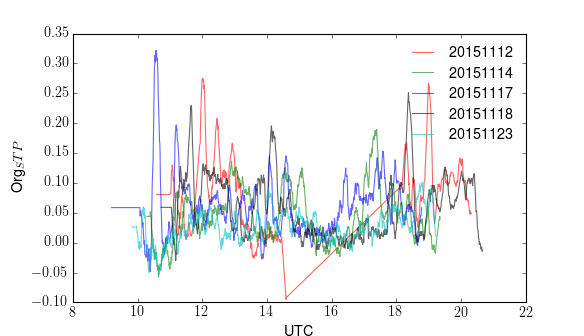

In [185]:
plt.figure()
cs = ['r','g','b','k','c','y']
for i,d in enumerate(days):
    #plt.plot(ams[i]['UTC_mid'],ams[i]['Org_STP'],'x',color=cs[i],label=d,alpha=0.3)
    plt.plot(ams[i]['UTC_mid'],Sp.smooth(ams[i]['Org_STP'],16),'-',color=cs[i],alpha=0.6,label=d)
plt.legend(frameon=False)
plt.xlabel('UTC')
plt.ylabel('Org_STP')

<IPython.core.display.Javascript object>


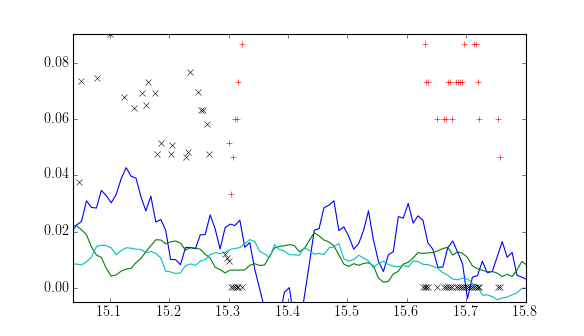

(15, 15.8)

In [210]:
plt.figure()
plt.plot(ams[2]['UTC_mid'],Sp.smooth(ams[2]['Org_STP'],14))
plt.plot(ams[2]['UTC_mid'],Sp.smooth(ams[2]['SO4_STP'],14),'-g')
plt.plot(ams[2]['UTC_mid'],Sp.smooth(ams[2]['Chl_STP'],14),'-c')

plt.plot(star[2]['Start_UTC'],star[2]['COD']/200.0,'xk')
plt.plot(star[2]['Start_UTC'],star[2]['REF']/100.0,'+r')
plt.xlim(15,15.8)

<IPython.core.display.Javascript object>


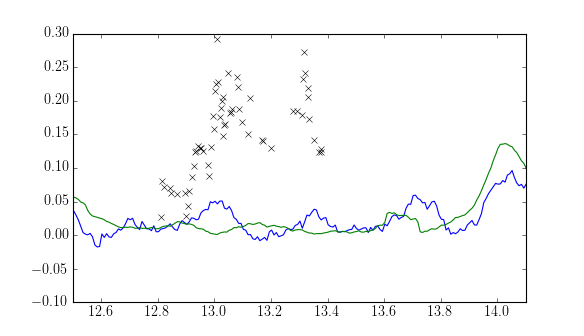

(12.5, 14.1)

In [206]:
plt.figure()
plt.plot(ams[4]['UTC_mid'],Sp.smooth(ams[4]['Org_STP'],14))
plt.plot(ams[4]['UTC_mid'],Sp.smooth(ams[4]['SO4_STP'],14),'-g')
plt.plot(star[4]['Start_UTC'],star[4]['COD']/100.0,'xk')
plt.xlim(12.5,14.1)

## Make correlation plots between COD and AMS values

In [221]:
import plotting_utils as pu

In [248]:
days

['20151112', '20151114', '20151117', '20151118', '20151123']

<IPython.core.display.Javascript object>


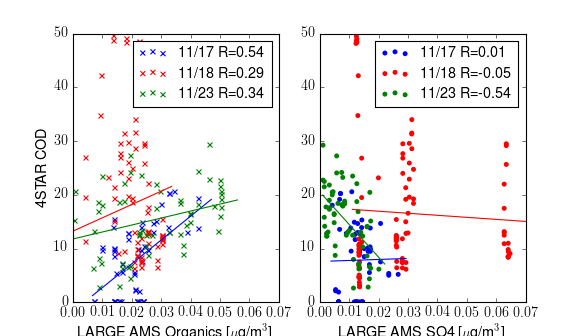

(0, 50)

In [50]:
fig,ax = plt.subplots(1,2)
ax = ax.ravel()
cs = ['c','y','b','r','g']
dd = ['11/12','11/14','11/17','11/18','11/23']
for i,d in enumerate(days):
    try:
        ic = (np.isfinite(star[i]['COD'])) & (star[i]['alt']<900.0)
    except:
        continue
    org_utc = nearest_neighbor(ams[i]['UTC_mid'],Sp.smooth(ams[i]['Org_STP'],14),star[i]['Start_UTC'][ic],dist=40.0/3600.0)
    so4_utc = nearest_neighbor(ams[i]['UTC_mid'],Sp.smooth(ams[i]['SO4_STP'],14),star[i]['Start_UTC'][ic],dist=40.0/3600.0)
    
    roo = np.corrcoef(org_utc,star[i]['COD'][ic])
    rss = np.corrcoef(so4_utc,star[i]['COD'][ic])
    ro = roo[0,1]
    rs = rss[0,1]
    #print roo,rss
    
    ax[0].scatter(org_utc,star[i]['COD'][ic],c=cs[i],marker='x',label=dd[i]+' R={:1.2f}'.format(ro))
    ax[1].scatter(so4_utc,star[i]['COD'][ic],c=cs[i],marker='o',label=dd[i]+' R={:1.2f}'.format(rs),edgecolor='None')
    pu.plot_lin(org_utc,star[i]['COD'][ic],color=cs[i],labels=False,shaded_ci=False,ax=ax[0])
    pu.plot_lin(so4_utc,star[i]['COD'][ic],color=cs[i],labels=False,shaded_ci=False,ax=ax[1])
    

ax[0].set_ylabel('4STAR COD')
ax[0].set_xlabel('LARGE AMS Organics [$\\mu$g/m$^3$]')
ax[0].legend(frameon=True)
ax[1].set_xlabel('LARGE AMS SO4 [$\\mu$g/m$^3$]')
plt.legend(frameon=True)
ax[0].set_xlim(0,0.07)
ax[0].set_ylim(0,50)
ax[1].set_xlim(0,0.07)
ax[1].set_ylim(0,50)
#plt.savefig(fp+'plot/COD_vs_AMS.png',transparent=True,dpi=600)

<IPython.core.display.Javascript object>


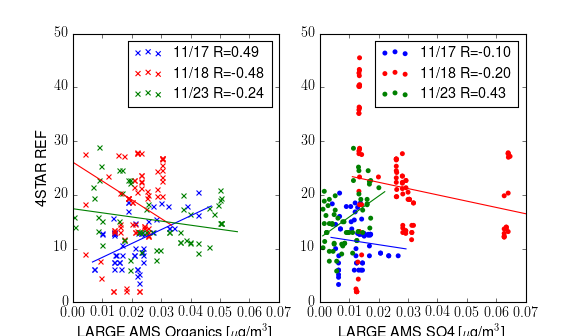

In [51]:
fig,ax = plt.subplots(1,2)
ax = ax.ravel()
cs = ['c','y','b','r','g']
dd = ['11/12','11/14','11/17','11/18','11/23']
for i,d in enumerate(days):
    try:
        ic = (np.isfinite(star[i]['COD'])) & (star[i]['alt']<900.0)
    except:
        continue
    org_utc = nearest_neighbor(ams[i]['UTC_mid'],Sp.smooth(ams[i]['Org_STP'],14),star[i]['Start_UTC'][ic],dist=40.0/3600.0)
    so4_utc = nearest_neighbor(ams[i]['UTC_mid'],Sp.smooth(ams[i]['SO4_STP'],14),star[i]['Start_UTC'][ic],dist=40.0/3600.0)
    
    roo = np.corrcoef(org_utc,star[i]['REF'][ic])
    rss = np.corrcoef(so4_utc,star[i]['REF'][ic])
    ro = roo[0,1]
    rs = rss[0,1]
    #print roo,rss
    
    ax[0].scatter(org_utc,star[i]['REF'][ic],c=cs[i],marker='x',label=dd[i]+' R={:1.2f}'.format(ro))
    ax[1].scatter(so4_utc,star[i]['REF'][ic],c=cs[i],marker='o',label=dd[i]+' R={:1.2f}'.format(rs),edgecolor='None')
    pu.plot_lin(org_utc,star[i]['REF'][ic],color=cs[i],labels=False,shaded_ci=False,ax=ax[0])
    pu.plot_lin(so4_utc,star[i]['REF'][ic],color=cs[i],labels=False,shaded_ci=False,ax=ax[1])
    

ax[0].set_ylabel('4STAR REF')
ax[0].set_xlabel('LARGE AMS Organics [$\\mu$g/m$^3$]')
ax[0].legend(frameon=True)
ax[1].set_xlabel('LARGE AMS SO4 [$\\mu$g/m$^3$]')
plt.legend(frameon=True)
ax[0].set_xlim(0,0.07)
ax[0].set_ylim(0,50)
ax[1].set_xlim(0,0.07)
ax[1].set_ylim(0,50)
plt.savefig(fp+'plot/REF_vs_AMS.png',transparent=True,dpi=600)

In [234]:
np.corrcoef(so4_utc,star[i]['COD'][ic])[0,1]**2

0.28844997255183091

In [213]:
np.isfinite(star[4]['COD'])

array([ True, False, False, ..., False,  True, False], dtype=bool)

In [ ]:
nearest_neighbor(hsk[i]['Start_UTC'],hsk[i]['GPS_Altitude'],cdp[i]['UTC_mid'],dist=1.0/3600.0)

## Plot out drizzling cases

<IPython.core.display.Javascript object>


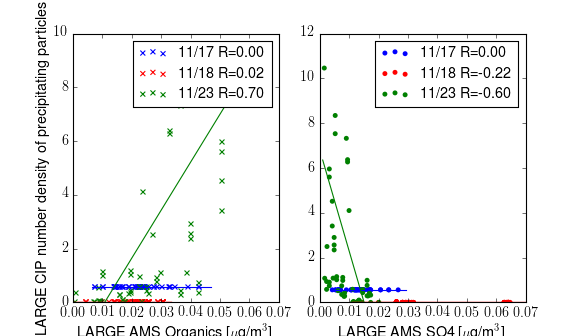

20151117 0.560425442525
20151118 0.00414796272104
20151123 2.89460952726


In [58]:
fig,ax = plt.subplots(1,2)
ax = ax.ravel()
cs = ['c','y','b','r','g']
dd = ['11/12','11/14','11/17','11/18','11/23']

for i,d in enumerate(days):
    try:
        ic = (np.isfinite(star[i]['COD'])) & (star[i]['alt']<900.0)
    except:
        continue
    cipn_utc = nearest_neighbor(cip[i]['UTC_mid'],Sp.smooth(cip[i]['nCIP'],14),star[i]['Start_UTC'][ic],dist=10.0/3600.0)
    print d,np.nanmean(cipn_utc)
    
    org_utc = nearest_neighbor(ams[i]['UTC_mid'],Sp.smooth(ams[i]['Org_STP'],14),star[i]['Start_UTC'][ic],dist=40.0/3600.0)
    so4_utc = nearest_neighbor(ams[i]['UTC_mid'],Sp.smooth(ams[i]['SO4_STP'],14),star[i]['Start_UTC'][ic],dist=40.0/3600.0)

    roo = np.corrcoef(org_utc,cipn_utc)
    rss = np.corrcoef(so4_utc,cipn_utc)
    ro = roo[0,1]
    rs = rss[0,1]
    #print roo,rss
    
    ax[0].scatter(org_utc,cipn_utc,c=cs[i],marker='x',label=dd[i]+' R={:1.2f}'.format(ro))
    ax[1].scatter(so4_utc,cipn_utc,c=cs[i],marker='o',label=dd[i]+' R={:1.2f}'.format(rs),edgecolor='None')
    pu.plot_lin(org_utc,cipn_utc,color=cs[i],labels=False,shaded_ci=False,ax=ax[0])
    pu.plot_lin(so4_utc,cipn_utc,color=cs[i],labels=False,shaded_ci=False,ax=ax[1])
    

ax[0].set_ylabel('LARGE CIP number density of precipitating particles')
ax[0].set_xlabel('LARGE AMS Organics [$\\mu$g/m$^3$]')
ax[0].legend(frameon=True)
ax[1].set_xlabel('LARGE AMS SO4 [$\\mu$g/m$^3$]')
plt.legend(frameon=True)
ax[0].set_xlim(0,0.07)
ax[0].set_ylim(0,10)
ax[1].set_xlim(0,0.07)
ax[1].set_ylim(0,12)
plt.savefig(fp+'plot/nCIP_vs_AMS.png',transparent=True,dpi=600)

## Plot out latitude and altitude dependence

### Plot out for 2015-11-17

<IPython.core.display.Javascript object>


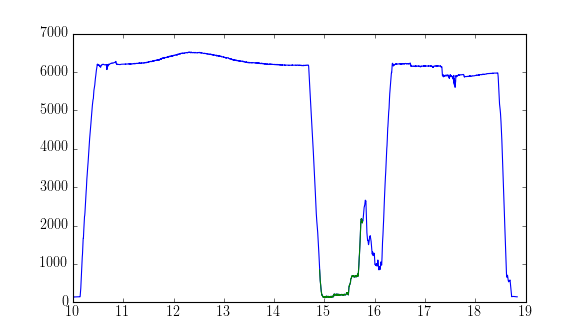

In [92]:
plt.figure()
plt.plot(hsk[2]['Start_UTC'],hsk[2]['GPS_Altitude'])
plt.plot(star[2]['Start_UTC'],star[2]['alt'])

In [103]:
star[2].keys()

['Start_UTC', 'LON', 'COD', 'LAT', 'alt', 'REF']

<IPython.core.display.Javascript object>


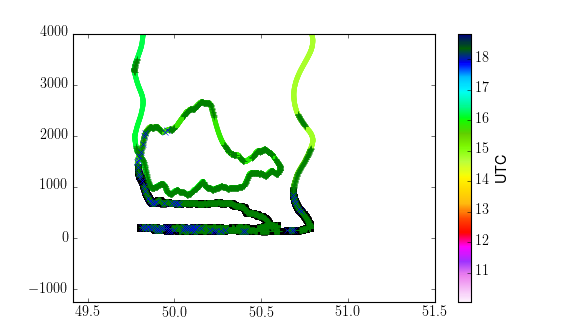

In [192]:
plt.figure()
a = plt.scatter(hsk[2]['Latitude'],hsk[2]['GPS_Altitude'],c=hsk[2]['Start_UTC'],edgecolor='None')
cb = plt.colorbar()
cb.set_label('UTC')

plt.plot(hsk[2]['Latitude'][(hsk[2]['Start_UTC']>14.9)&(hsk[2]['Start_UTC']<15.7)],
         hsk[2]['GPS_Altitude'][(hsk[2]['Start_UTC']>14.9)&(hsk[2]['Start_UTC']<15.7)],'sk')

plt.plot(cld[2]['lat'][cld[2]['CloudFlag']==1],cld[2]['alt'][cld[2]['CloudFlag']==1],'+g')
plt.plot(star[2]['LAT'],star[2]['alt'],'x')

Lowest legs for 2015-11-17 occur at 14.9 to 15.7 UTCH

<IPython.core.display.Javascript object>


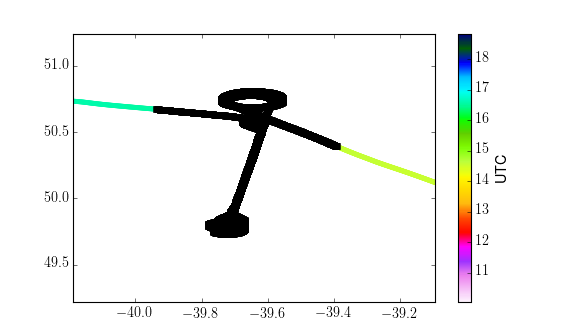

In [265]:
plt.figure()
plt.scatter(hsk[2]['Longitude'],hsk[2]['Latitude'],c=hsk[2]['Start_UTC'],edgecolor='None')
cb = plt.colorbar()
cb.set_label('UTC')

plt.plot(hsk[2]['Longitude'][(hsk[2]['Start_UTC']>14.6)&(hsk[2]['Start_UTC']<16.55)],
         hsk[2]['Latitude'][(hsk[2]['Start_UTC']>14.6)&(hsk[2]['Start_UTC']<16.55)],'sk')

<IPython.core.display.Javascript object>


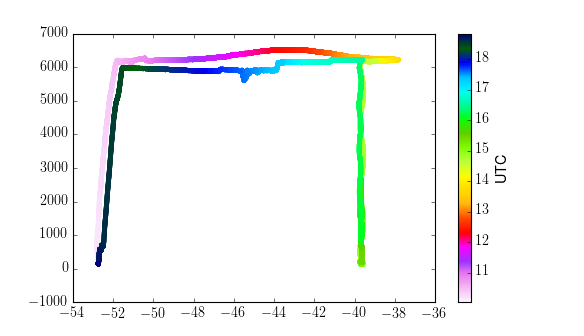

In [254]:
plt.figure()
a = plt.scatter(hsk[2]['Longitude'],hsk[2]['GPS_Altitude'],c=hsk[2]['Start_UTC'],edgecolor='None')
cb = plt.colorbar()
cb.set_label('UTC')

In [134]:
icdp = (cdp[2]['UTC_mid']>14.5) & (cdp[2]['UTC_mid']<17.5)

In [174]:
irsp = (rsp[2]['UTC_start']/3600.0>14.5) & (rsp[2]['UTC_start']/3600.0<17.5)

In [175]:
rsp[2].keys()

['COT_rad_1590',
 'Reff_rad_2260',
 'COT',
 'Reff_rad_1590',
 'UTC_stop',
 'Lon',
 'Veff_unc',
 'CTH_stereo',
 'Reff_unc',
 'COT_rad_2260',
 'Lat',
 'UTC_start',
 'Veff',
 'Reff']

In [153]:
matplotlib.cm.gist_ncar_r

<IPython.core.display.Javascript object>


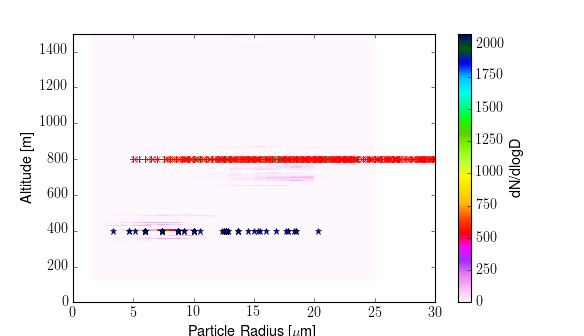

In [177]:
plt.figure()
plt.set_cmap('gist_ncar_r')
plt.pcolor(np.array(cdp_binsc)/2.0,cdp[2]['alt'][icdp],
           cdp_bins[2][:,icdp].transpose())
plt.plot(star[2]['REF'],star[2]['REF']*0.0+400.0,'*',label='4STAR')
plt.plot(rsp[2]['Reff'][irsp],rsp[2]['Reff'][irsp]*0.0+800.0,'+',label='RSP')
plt.plot(rsp[2]['Reff_rad_1590'][irsp],rsp[2]['Reff_rad_1590'][irsp]*0.0+800.0,
         'x',label='RSP Radiance')

plt.ylim(0,1500)

plt.xlabel('Particle Radius [$\\mu$m]')
plt.ylabel('Altitude [m]')

cb = plt.colorbar()
cb.set_label('dN/dlogD')

### Plot out for 2015-11-23

<IPython.core.display.Javascript object>


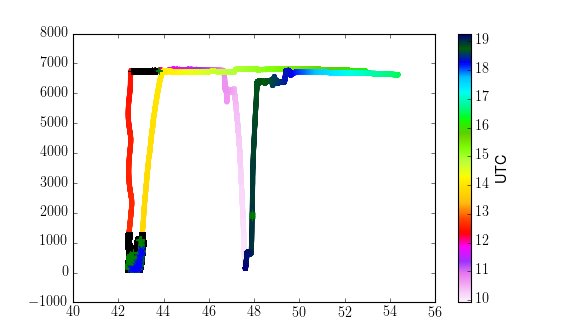

In [276]:
plt.figure()
a = plt.scatter(hsk[4]['Latitude'],hsk[4]['GPS_Altitude'],c=hsk[4]['Start_UTC'],edgecolor='None')
cb = plt.colorbar()
cb.set_label('UTC')

plt.plot(hsk[4]['Latitude'][(hsk[4]['Start_UTC']>12.65)&(hsk[4]['Start_UTC']<13.8)],
         hsk[4]['GPS_Altitude'][(hsk[4]['Start_UTC']>12.65)&(hsk[4]['Start_UTC']<13.8)],'sk')

plt.plot(hsk[4]['Latitude'][(hsk[4]['Start_UTC']>12.1)&(hsk[4]['Start_UTC']<12.43)],
         hsk[4]['GPS_Altitude'][(hsk[4]['Start_UTC']>12.1)&(hsk[4]['Start_UTC']<12.43)],'+k')

plt.plot(cld[4]['lat'][cld[4]['CloudFlag']==1],cld[4]['alt'][cld[4]['CloudFlag']==1],'+g')
plt.plot(star[4]['LAT'],star[4]['alt'],'x')

<IPython.core.display.Javascript object>


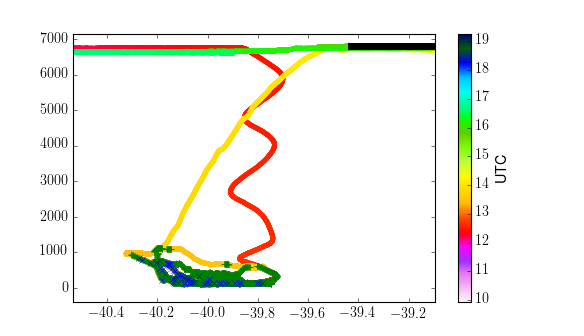

In [253]:
plt.figure()
a = plt.scatter(hsk[4]['Longitude'],hsk[4]['GPS_Altitude'],c=hsk[4]['Start_UTC'],edgecolor='None')
cb = plt.colorbar()
cb.set_label('UTC')

plt.plot(hsk[4]['Longitude'][(hsk[4]['Start_UTC']>14.9)&(hsk[4]['Start_UTC']<15.7)],
         hsk[4]['GPS_Altitude'][(hsk[4]['Start_UTC']>14.9)&(hsk[4]['Start_UTC']<15.7)],'sk')

plt.plot(cld[4]['lon'][cld[4]['CloudFlag']==1],cld[4]['alt'][cld[4]['CloudFlag']==1],'+g')
plt.plot(star[4]['LON'],star[4]['alt'],'x')

In [194]:
rsp[4].keys()

['COT_rad_1590',
 'Reff_rad_2260',
 'COT',
 'Reff_rad_1590',
 'UTC_stop',
 'Lon',
 'Veff_unc',
 'CTH_stereo',
 'Reff_unc',
 'COT_rad_2260',
 'Lat',
 'UTC_start',
 'Veff',
 'Reff']

<IPython.core.display.Javascript object>


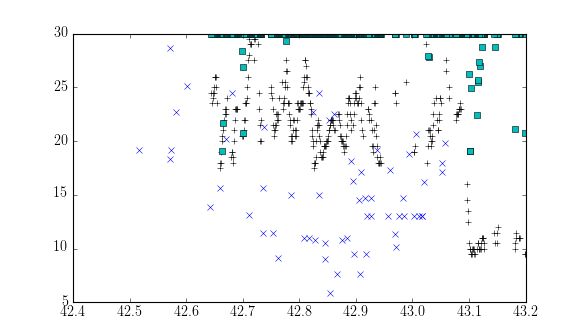

(42.4, 43.2)

In [198]:
plt.figure()
plt.plot(star[4]['LAT'],star[4]['REF'],'xb',label='4STAR')
plt.plot(rsp[4]['Lat'],rsp[4]['Reff'],'+k',label='RSP')
plt.plot(rsp[4]['Lat'],rsp[4]['Reff_rad_1590'],'+r',label='RSP rad 1590nm')
plt.plot(rsp[4]['Lat'],rsp[4]['Reff_rad_2260'],'sc',label='RSP rad 2260nm')
plt.xlim(42.4,43.2)

<IPython.core.display.Javascript object>


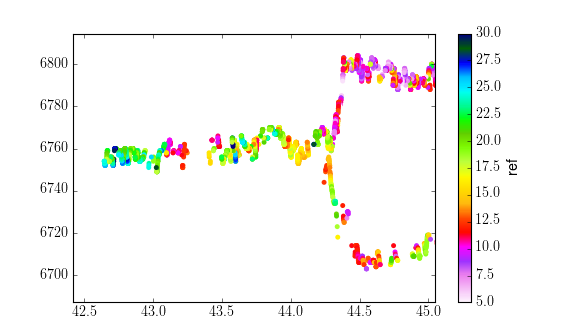

In [201]:
plt.figure()
plt.scatter(rsp[4]['Lat'],rsp[4]['alt'],c=rsp[4]['Reff'],edgecolor='None')
cb = plt.colorbar()
cb.set_label('ref')

<IPython.core.display.Javascript object>


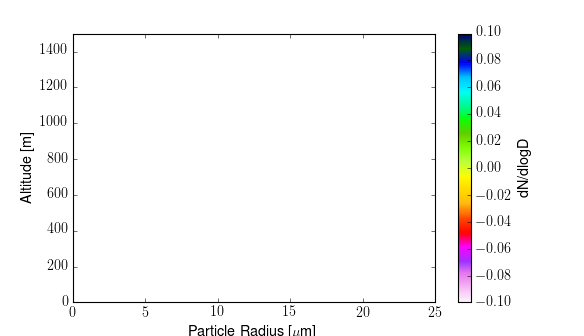

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel\__main__.py:3: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 32953 but corresponding boolean dimension is 30896
  app.launch_new_instance()
C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel\__main__.py:4: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 1; dimension is 32953 but corresponding boolean dimension is 30896


In [204]:
plt.figure()
plt.set_cmap('gist_ncar_r')
plt.pcolor(np.array(cdp_binsc)/2.0,cdp[4]['alt'][icdp],
           cdp_bins[4][:,icdp].transpose())
#plt.plot(star[2]['REF'],star[2]['REF']*0.0+400.0,'*',label='4STAR')
#plt.plot(rsp[2]['Reff'][irsp],rsp[2]['Reff'][irsp]*0.0+800.0,'+',label='RSP')
#plt.plot(rsp[2]['Reff_rad_1590'][irsp],rsp[2]['Reff_rad_1590'][irsp]*0.0+800.0,
#         'x',label='RSP Radiance')

plt.ylim(0,1500)

plt.xlabel('Particle Radius [$\\mu$m]')
plt.ylabel('Altitude [m]')

cb = plt.colorbar()
cb.set_label('dN/dlogD')